![image info](https://ineuron.ai/images/ineuron-logo.png)`

# Shipment Pricing Prediction
**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Data Collection
* Data Cleaning
* Exploratory data analysis
* Data Pre-Processing
* Model Training 
* Choose best model

## 1) Problem statement.

- You work for a company that sells sculptures that are acquired from various artists around the world. Your task is to predict the cost required to ship these sculptures to customers based on the information provided in the dataset.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv(r"D:\DATA SCIENCE WITH GENAI\PROJECTS\SHIPAGE_PRICE_PREDICTION\data\train.csv")

In [3]:
df.head(5)

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23


In [4]:
df.describe()

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost
count,5750.000000,6125.000000,5916.000000,5.913000e+03,6500.00000,6500.000000,6.500000e+03
mean,0.461850,21.766204,9.617647,4.006948e+05,1192.42009,37.407174,1.713920e+04
std,0.265781,11.968192,5.417000,2.678081e+06,8819.61675,26.873519,2.406579e+05
min,0.000000,3.000000,2.000000,3.000000e+00,3.00000,10.000000,-8.801727e+05
25%,0.240000,12.000000,6.000000,5.030000e+02,5.23000,16.700000,1.884400e+02
50%,0.450000,20.000000,8.000000,3.102000e+03,8.02500,23.505000,3.820650e+02
75%,0.680000,30.000000,12.000000,3.645600e+04,89.47000,57.905000,1.156115e+03
max,1.000000,73.000000,50.000000,1.179279e+08,382385.67000,99.980000,1.114343e+07


In [5]:
df.shape

(6500, 20)

In [6]:
df.columns

Index(['Customer Id', 'Artist Name', 'Artist Reputation', 'Height', 'Width',
       'Weight', 'Material', 'Price Of Sculpture', 'Base Shipping Price',
       'International', 'Express Shipment', 'Installation Included',
       'Transport', 'Fragile', 'Customer Information', 'Remote Location',
       'Scheduled Date', 'Delivery Date', 'Customer Location', 'Cost'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Id            6500 non-null   object 
 1   Artist Name            6500 non-null   object 
 2   Artist Reputation      5750 non-null   float64
 3   Height                 6125 non-null   float64
 4   Width                  5916 non-null   float64
 5   Weight                 5913 non-null   float64
 6   Material               5736 non-null   object 
 7   Price Of Sculpture     6500 non-null   float64
 8   Base Shipping Price    6500 non-null   float64
 9   International          6500 non-null   object 
 10  Express Shipment       6500 non-null   object 
 11  Installation Included  6500 non-null   object 
 12  Transport              5108 non-null   object 
 13  Fragile                6500 non-null   object 
 14  Customer Information   6500 non-null   object 
 15  Remo

In [8]:
df.isnull().sum()

Customer Id                 0
Artist Name                 0
Artist Reputation         750
Height                    375
Width                     584
Weight                    587
Material                  764
Price Of Sculpture          0
Base Shipping Price         0
International               0
Express Shipment            0
Installation Included       0
Transport                1392
Fragile                     0
Customer Information        0
Remote Location           771
Scheduled Date              0
Delivery Date               0
Customer Location           0
Cost                        0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.describe()

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost
count,3362.000000,3362.000000,3362.000000,3.362000e+03,3362.000000,3362.000000,3.362000e+03
mean,0.460428,21.850089,9.619572,4.035124e+05,1240.340793,37.163132,1.428148e+04
std,0.265469,11.887132,5.420888,2.958236e+06,9627.382836,26.711234,1.465081e+05
min,0.000000,3.000000,2.000000,4.000000e+00,3.000000,10.000000,-2.529660e+05
25%,0.240000,13.000000,6.000000,5.080000e+02,5.250000,16.700000,1.906900e+02
50%,0.445000,20.000000,8.000000,2.999000e+03,7.765000,23.440000,3.800150e+02
75%,0.670000,30.000000,12.000000,3.575750e+04,90.972500,57.187500,1.145588e+03
max,1.000000,73.000000,45.000000,1.179279e+08,382385.670000,99.950000,4.020732e+06


### Statistical Inferences
- Median Price Of Sculpture is 1192.
- 25% of the population is Price Of Sculpture below 5
- Average Artist Reputation of the population is 0.46

* The difference between 75th percentile and Max also suggests the skewness 

* We can confirm the insights we got from data distribution, as skewness is more for Height, Width, and Base Shipping Price, and skewness of Weight, Price of Sculpture because of Outliers 

In [11]:
cat_cols= [col for col in df.columns if df[col].dtypes=="object"]

In [12]:
cat_cols

['Customer Id',
 'Artist Name',
 'Material',
 'International',
 'Express Shipment',
 'Installation Included',
 'Transport',
 'Fragile',
 'Customer Information',
 'Remote Location',
 'Scheduled Date',
 'Delivery Date',
 'Customer Location']

In [13]:
num_cols= [col for col in df.columns if df[col].dtypes !="object"]
num_cols

['Artist Reputation',
 'Height',
 'Width',
 'Weight',
 'Price Of Sculpture',
 'Base Shipping Price',
 'Cost']

In [32]:
print('We have {} numerical features : {}'.format(len(num_cols), num_cols))
print('\nWe have {} categorical features : {}'.format(len(cat_cols), cat_cols))

We have 7 numerical features : ['Artist Reputation', 'Height', 'Width', 'Weight', 'Price Of Sculpture', 'Base Shipping Price', 'Cost']

We have 13 categorical features : ['Customer Id', 'Artist Name', 'Material', 'International', 'Express Shipment', 'Installation Included', 'Transport', 'Fragile', 'Customer Information', 'Remote Location', 'Scheduled Date', 'Delivery Date', 'Customer Location']


# Analysis of num cols

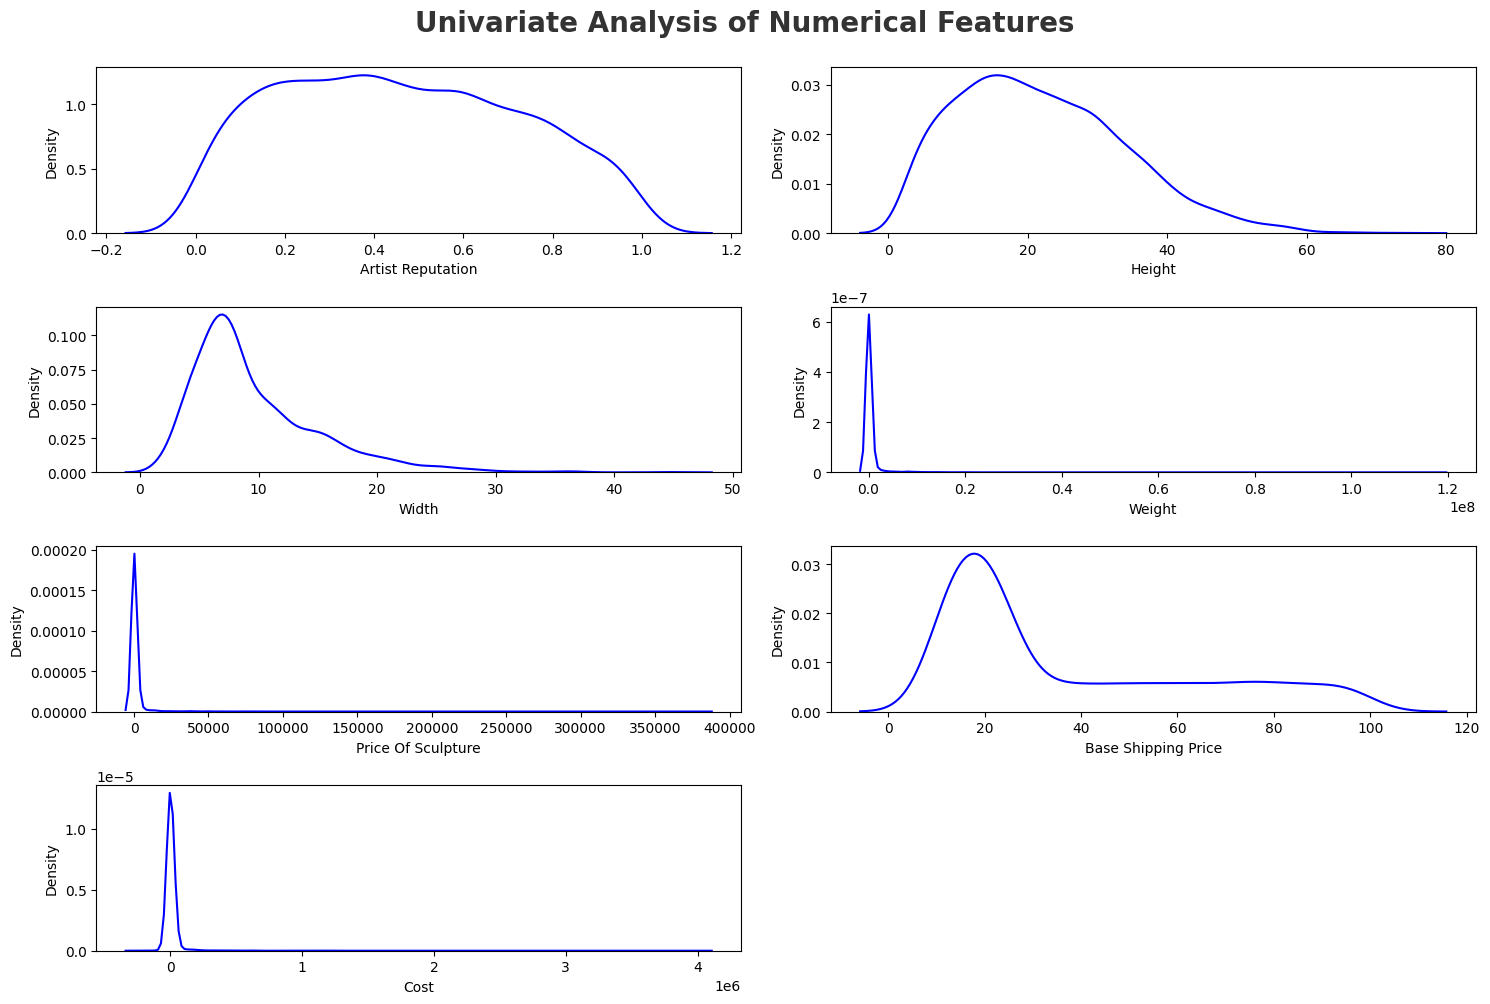

In [33]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num_cols)):
    plt.subplot(4, 2, i+1)
    sns.kdeplot(x=df[num_cols[i]], color='blue')
    plt.xlabel(num_cols[i])
    plt.tight_layout()

<font size=3>**Report**</font> 

* <font size=3> `Height`, `Width` and `Base Shipping price` are positively skewed</font> 

* <font size=3>`Weight`, `Price of Sculpture` has many outliers</font> 

array([[<Axes: title={'center': 'Artist Reputation'}>,
        <Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Width'}>],
       [<Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'Price Of Sculpture'}>,
        <Axes: title={'center': 'Base Shipping Price'}>],
       [<Axes: title={'center': 'Cost'}>, <Axes: >, <Axes: >]],
      dtype=object)

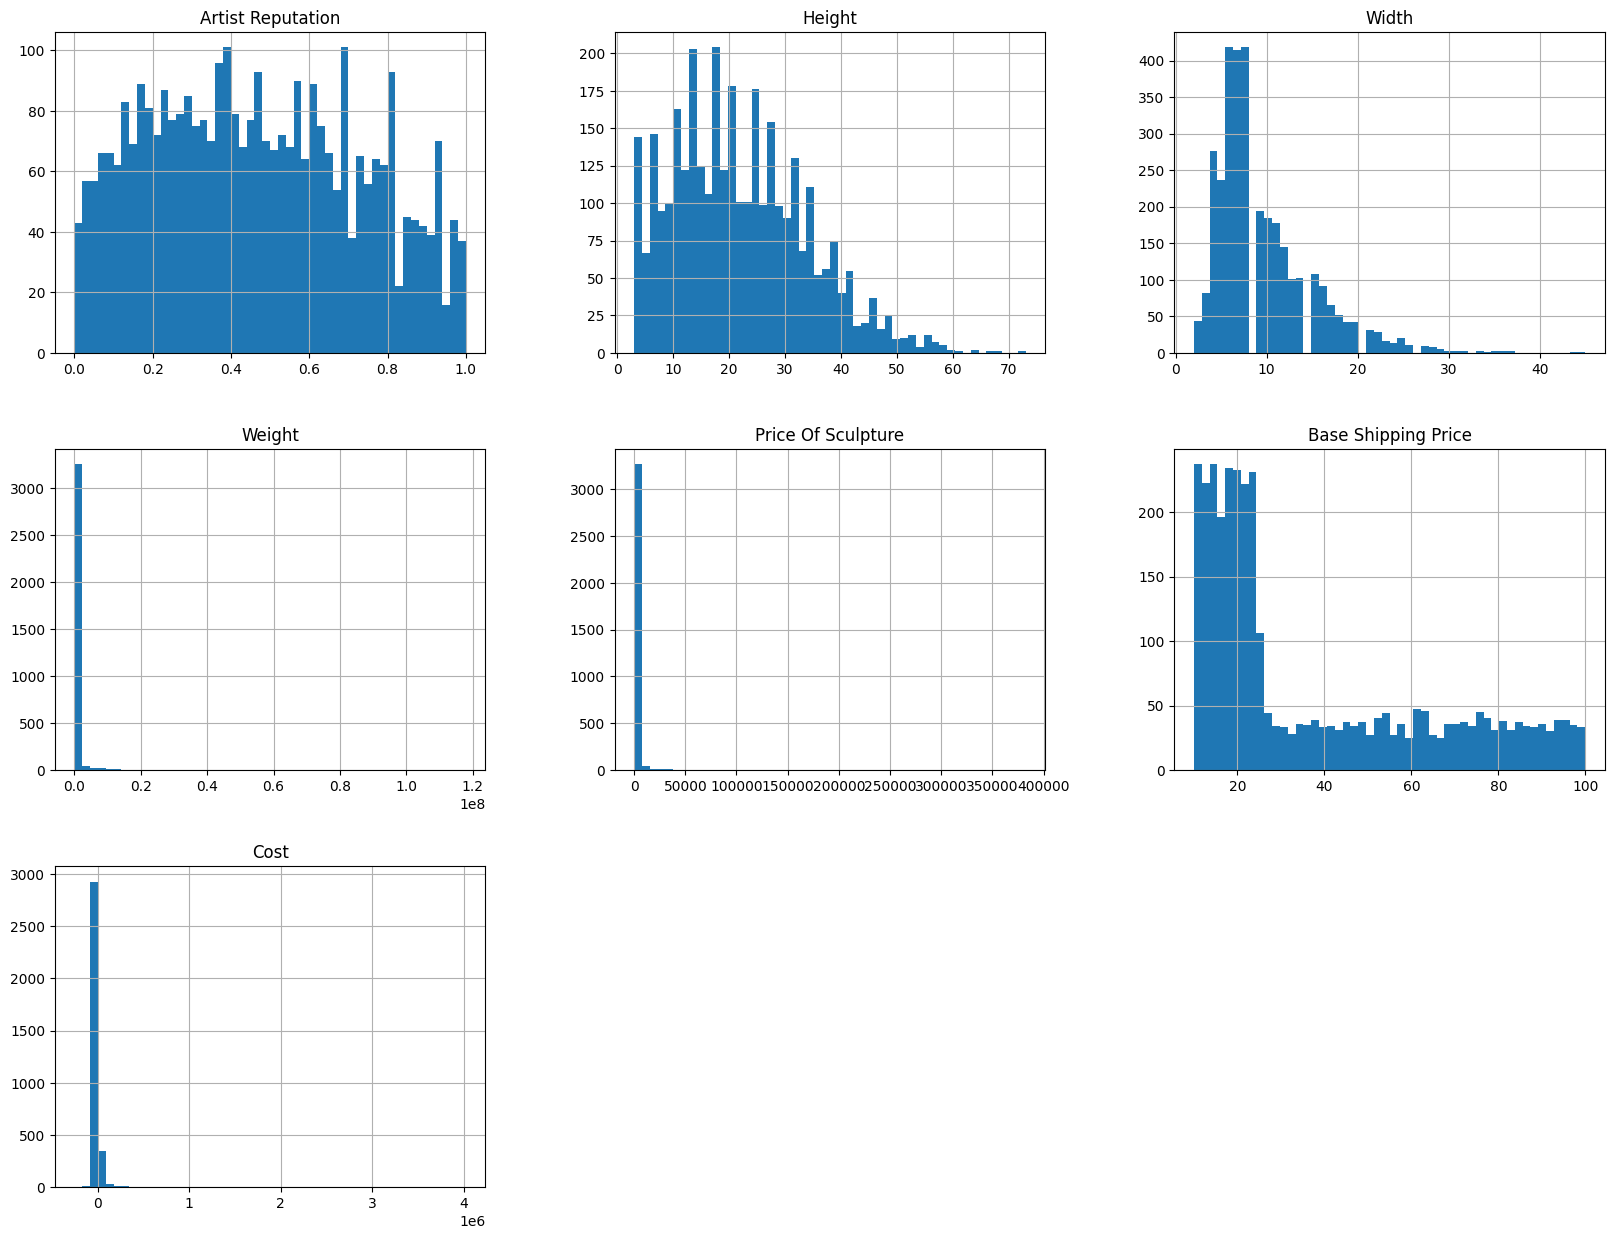

In [14]:
df.hist(bins=50, figsize=(20,15))

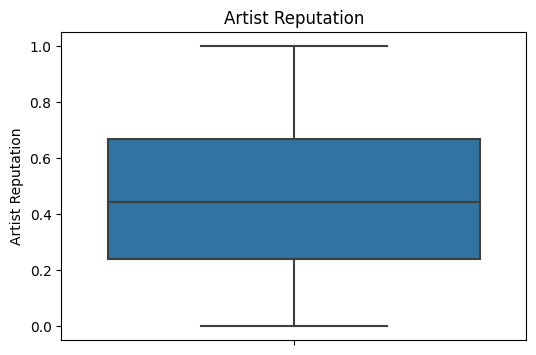

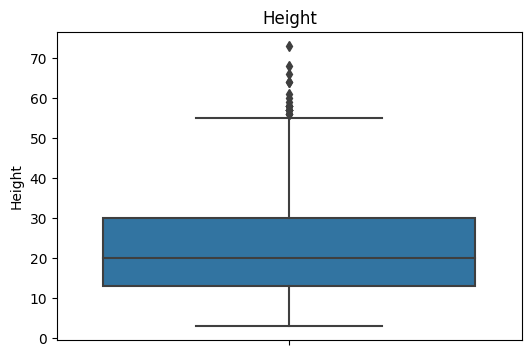

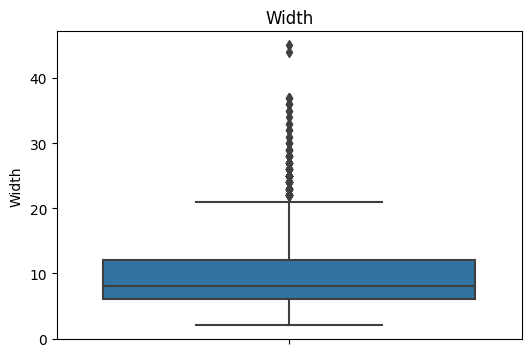

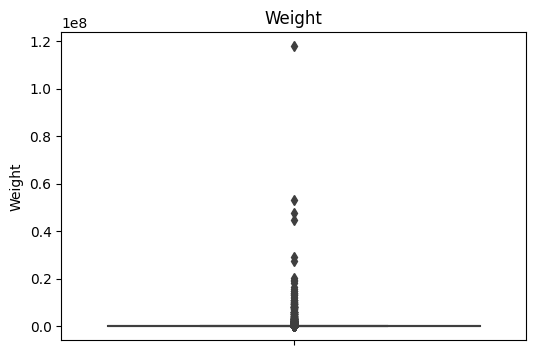

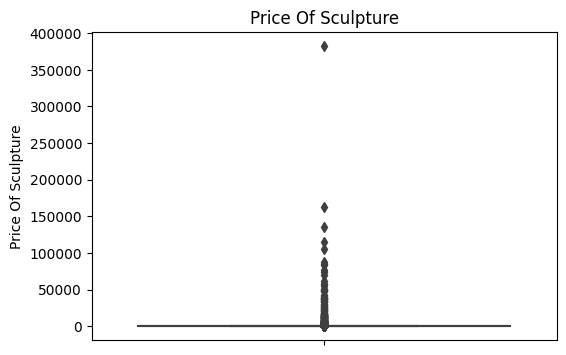

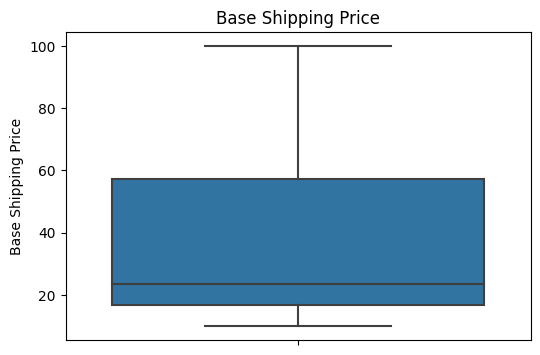

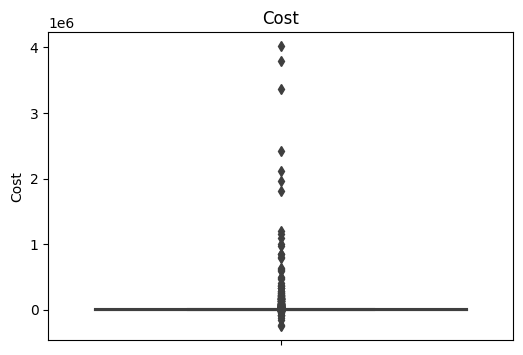

In [15]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[col])
    plt.title(f"{col}")
    plt.show()

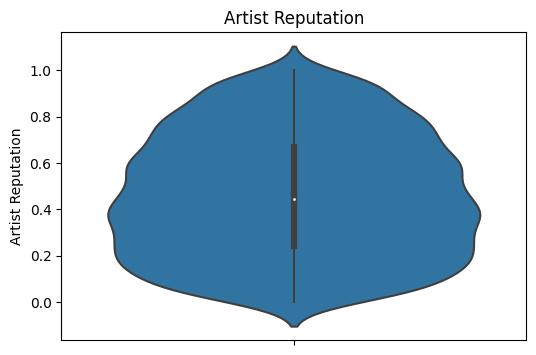

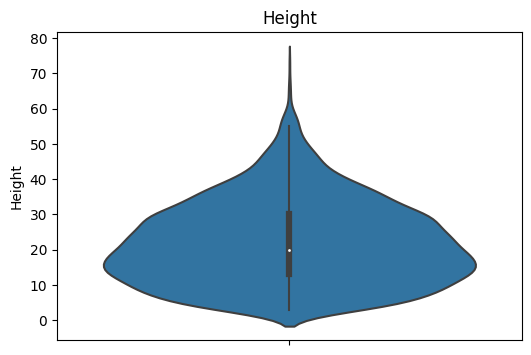

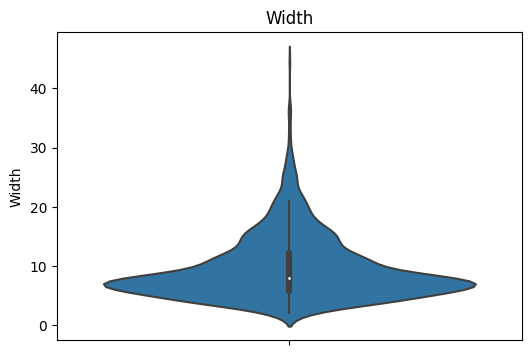

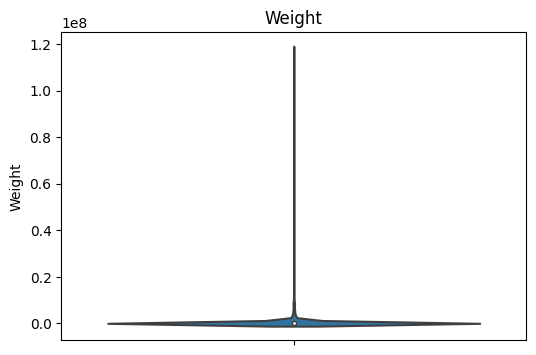

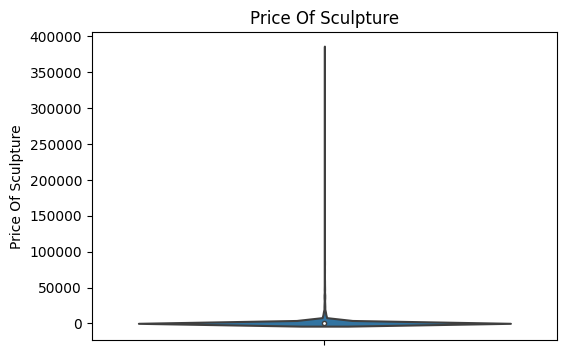

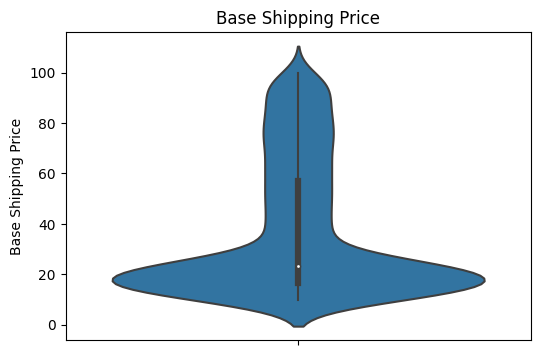

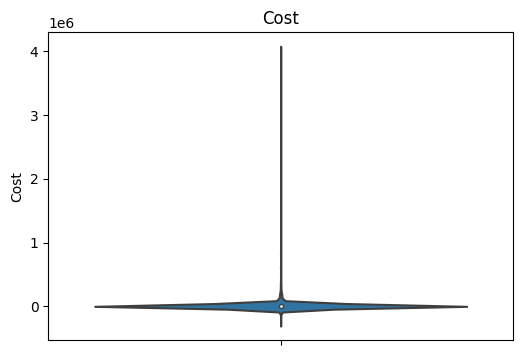

In [16]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.violinplot(y=df[col])
    plt.title(f"{col}")
    plt.show()
    

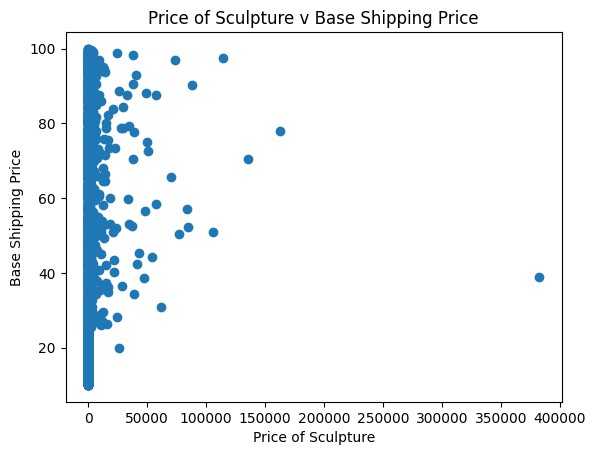

In [17]:
plt.scatter(df['Price Of Sculpture'],df['Base Shipping Price'])
plt.xlabel('Price of Sculpture')
plt.ylabel('Base Shipping Price')
plt.title('Price of Sculpture v Base Shipping Price')
plt.show()


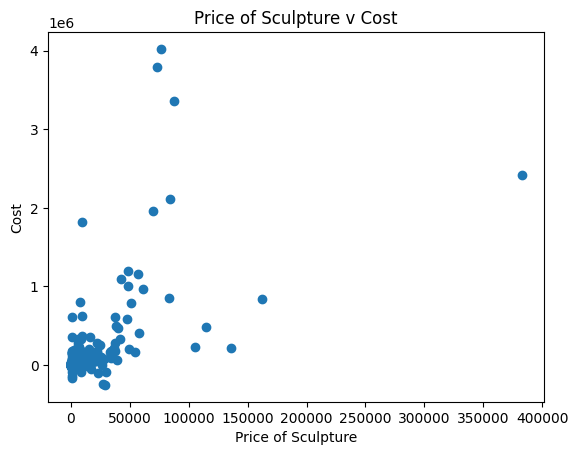

In [18]:
plt.scatter(df['Price Of Sculpture'],df['Cost'])
plt.xlabel('Price of Sculpture')
plt.ylabel('Cost')
plt.title('Price of Sculpture v Cost')
plt.show()


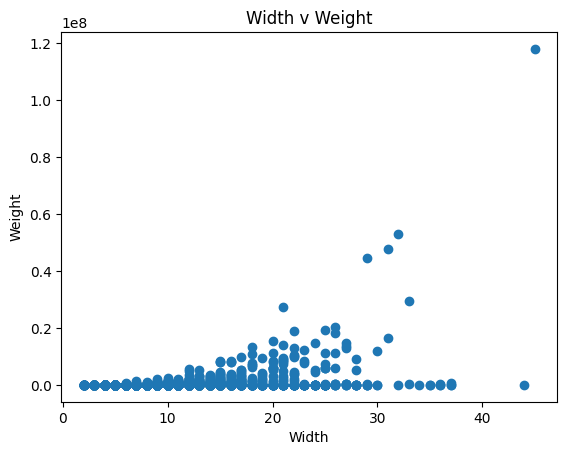

In [19]:
plt.scatter(df['Width'],df['Weight'])
plt.xlabel('Width')
plt.ylabel('Weight')
plt.title('Width v Weight')
plt.show()


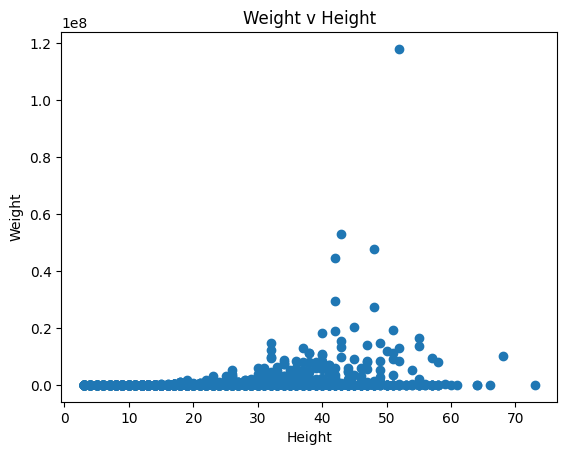

In [20]:
plt.scatter(df['Height'],df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Weight v Height')
plt.show()


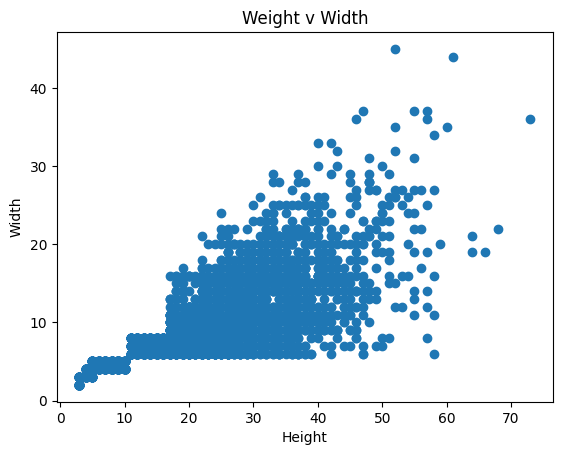

In [21]:
plt.scatter(df['Height'],df['Width'])
plt.xlabel('Height')
plt.ylabel('Width')
plt.title('Weight v Width')
plt.show()


In [ ]:
sns.pairplot(df[num_cols])
plt.show()

# Analysis of Categorical Columns

In [30]:
for col in cat_cols:
    unique_values = df[col].unique()
    print(f"Unique values in '{col}':")
    print(unique_values)
    print("\n") 
    print(f"total values in '{col}'-->:",len(df[col].unique())) 
    print("\n")

Unique values in 'Customer Id':
['fffe3900350033003300' 'fffe3800330031003900' 'fffe3600370035003100' ...
 'fffe3800370037003300' 'fffe3600350035003900' 'fffe3700310031003600']


total values in 'Customer Id'-->: 3362


Unique values in 'Artist Name':
['Billy Jenkins' 'Jean Bryant' 'Laura Miller' ... 'Jeffrey Freudenthal'
 'Daniel Drew' 'Vernon Carroll']


total values in 'Artist Name'-->: 3351


Unique values in 'Material':
['Brass' 'Clay' 'Aluminium' 'Marble' 'Bronze' 'Stone' 'Wood']


total values in 'Material'-->: 7


Unique values in 'International':
['Yes' 'No']


total values in 'International'-->: 2


Unique values in 'Express Shipment':
['Yes' 'No']


total values in 'Express Shipment'-->: 2


Unique values in 'Installation Included':
['No' 'Yes']


total values in 'Installation Included'-->: 2


Unique values in 'Transport':
['Airways' 'Roadways' 'Waterways']


total values in 'Transport'-->: 3


Unique values in 'Fragile':
['No' 'Yes']


total values in 'Fragile'-->: 2


Uni

In [ ]:
df = df.drop(columns=['Customer Id', 'Artist Name','Customer Location'])

In [47]:
cat_cols= [col for col in df.columns if df[col].dtypes=="object"]
cat_cols

['Material',
 'International',
 'Express Shipment',
 'Installation Included',
 'Transport',
 'Fragile',
 'Customer Information',
 'Remote Location',
 'Scheduled Date',
 'Delivery Date']

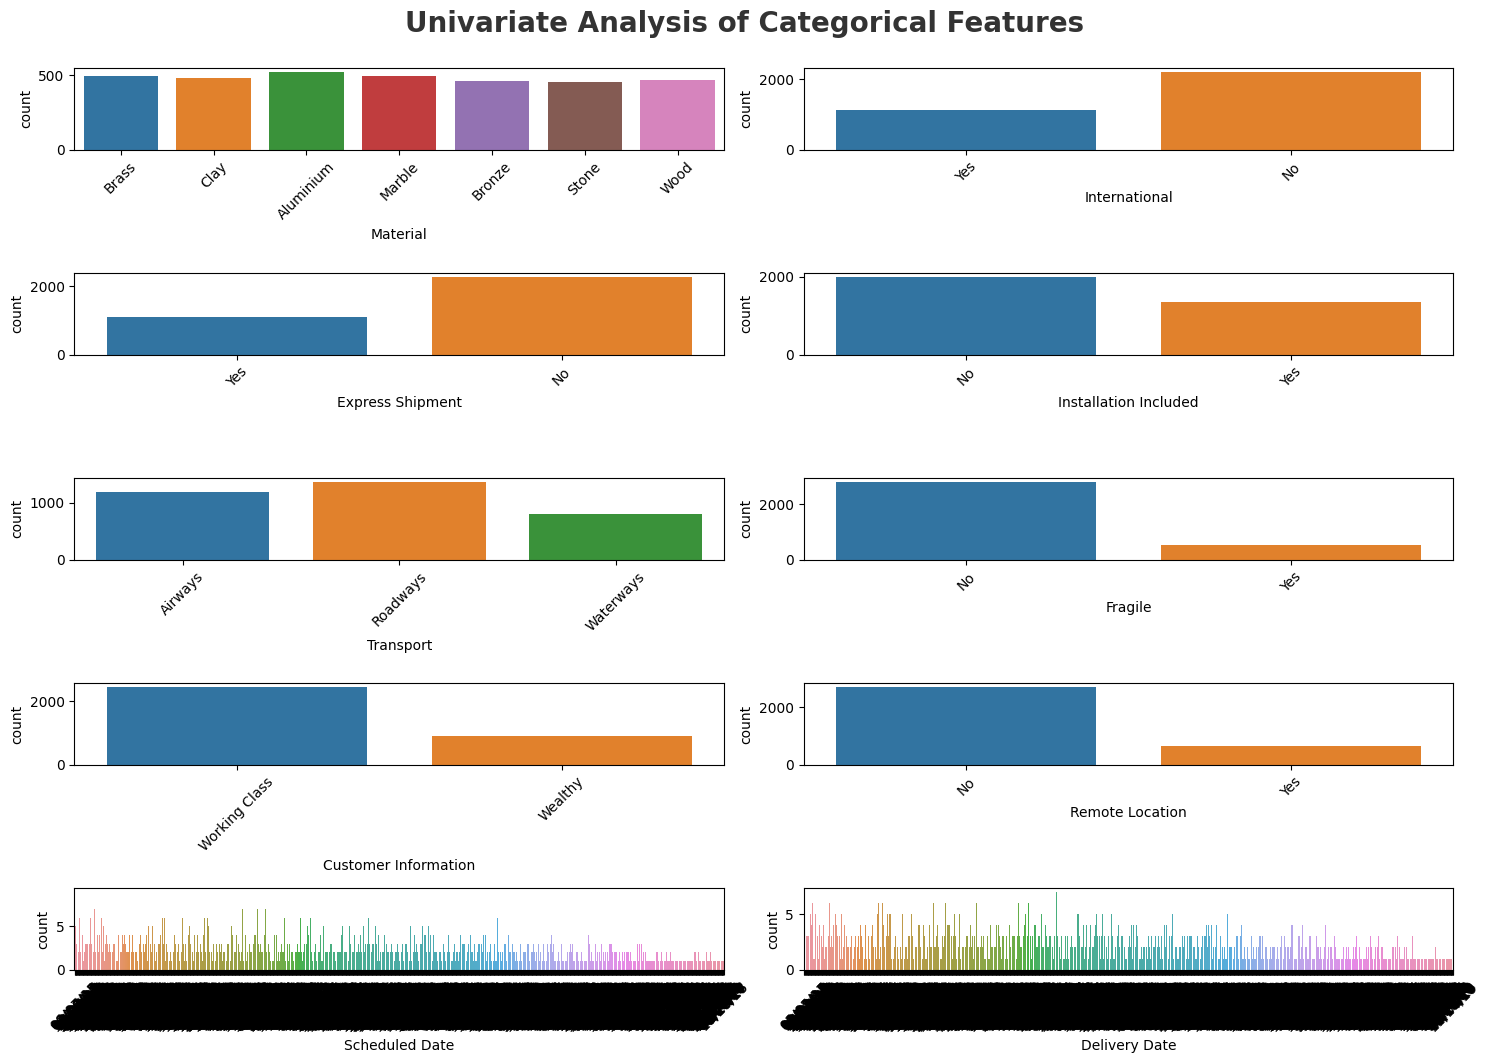

In [50]:
# categorical columns
plt.figure(figsize=(15, 20))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(cat_cols)):
    plt.subplot(len(cat_cols), 2, i+1)
    sns.countplot(x=df[cat_cols[i]])
    plt.xlabel(cat_cols[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

**Insights** 

* `Material column` has seven unique value, which are almost equally distributed</font> 

* There are 6 bi-variate categorical columns</font> 

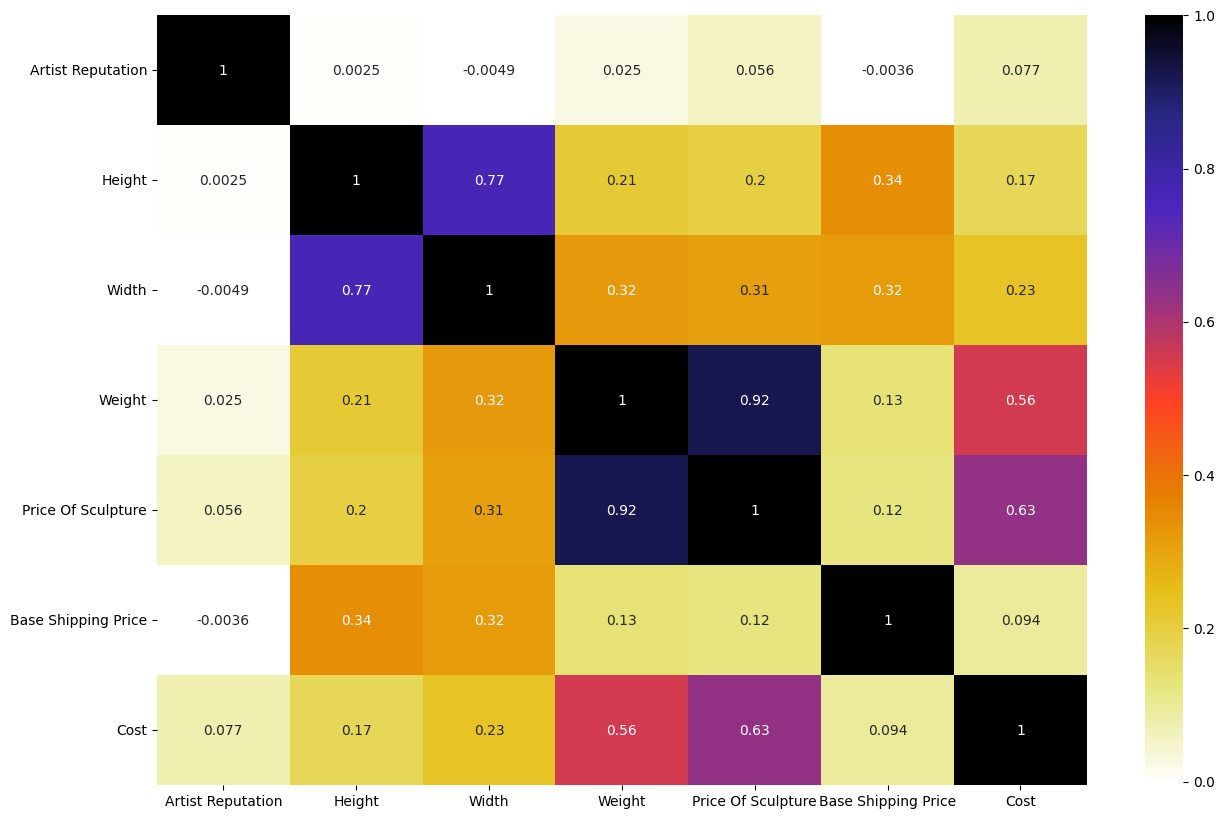

In [57]:
plt.figure(figsize = (15,10))
sns.heatmap(df[num_cols].corr(), cmap="CMRmap_r", annot=True)
plt.show()

**Insights** 

- There is a high correlation between `Height`-`Width`, and `Weight`-`Price of Sculpture` 


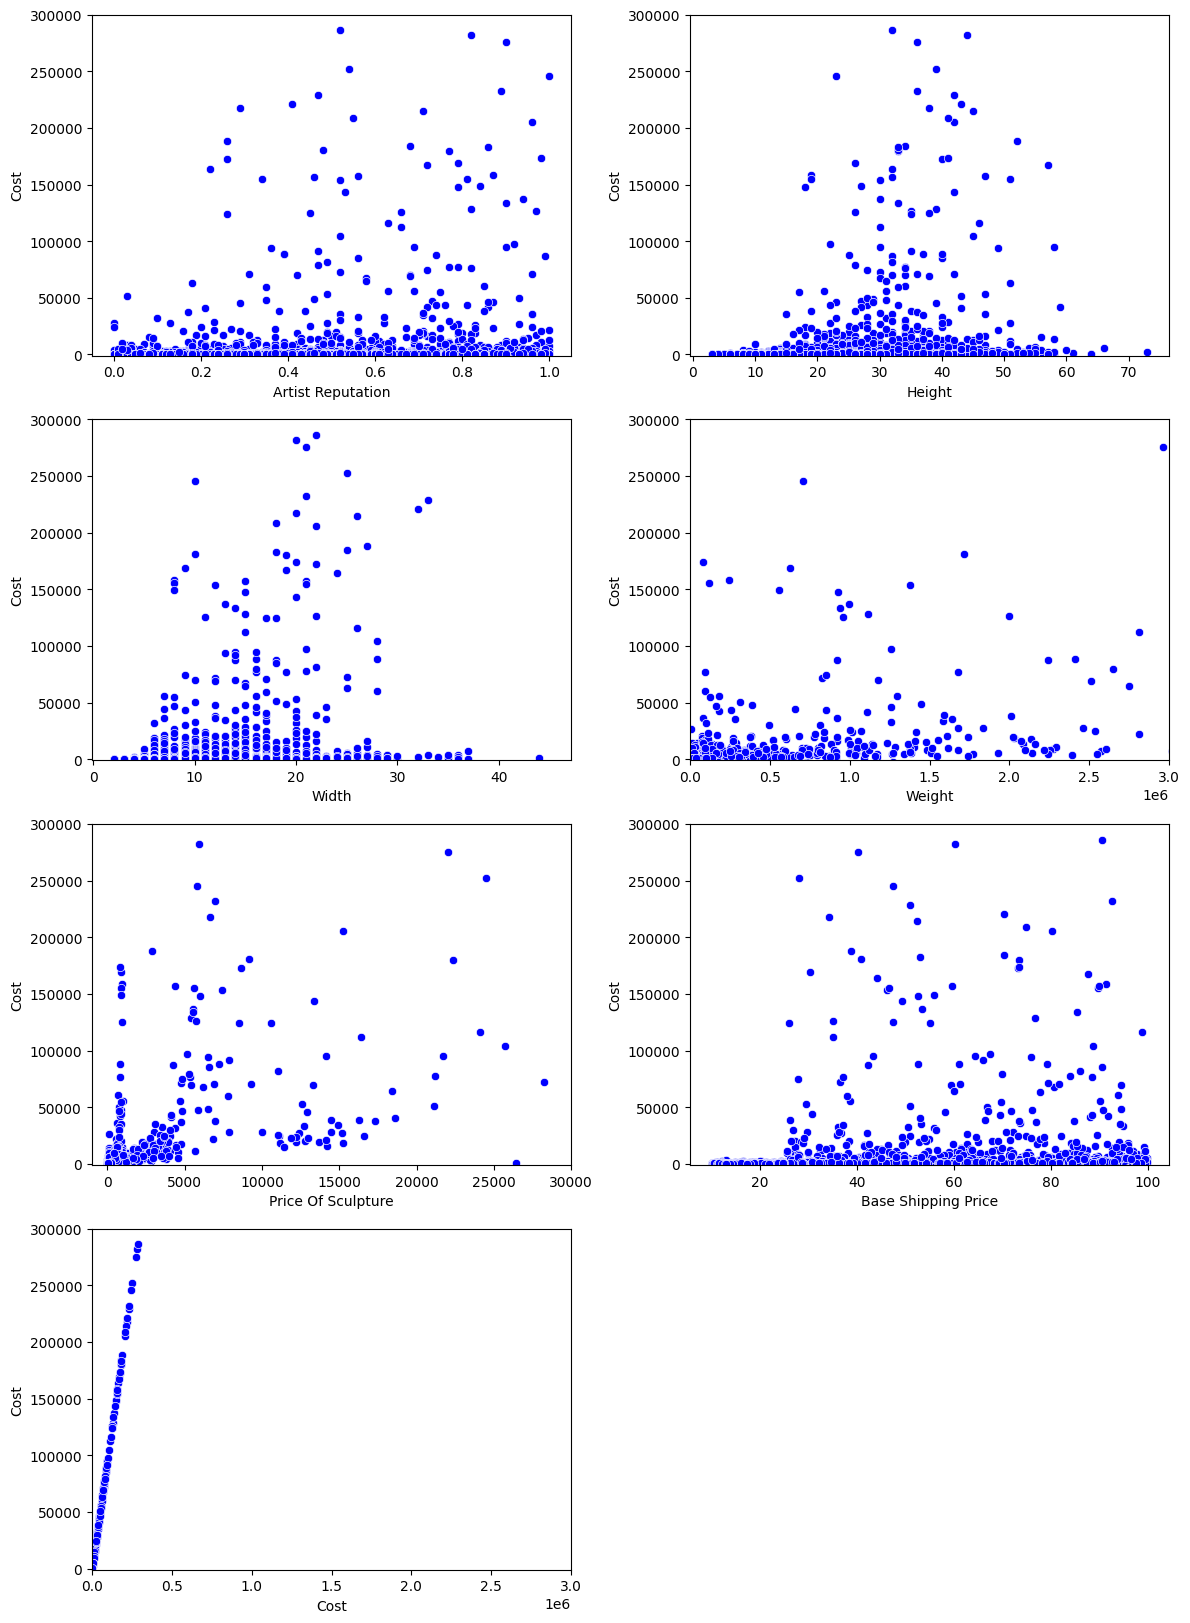

In [65]:
target_feature= df["Cost"]
fig = plt.figure(figsize=(12, 24))

for i in range(0, len(num_cols)):
    ax = plt.subplot(6, 2, i+1)
    sns.scatterplot(data= df ,y=target_feature, x=num_cols[i], color='b')
    if df[num_cols[i]].max() > 30000:
        plt.xlim(-1000,30000)
    if df[num_cols[i]].max() > 3000000:
        plt.xlim(-1000,3000000)
    plt.ylim(-1000, 300000)
    plt.tight_layout()

**Insights** 

- We can observe that there seems to be very low linear relationship between the independent and dependent features

- There seems to be linear relationship between Price of sculpture and the target column

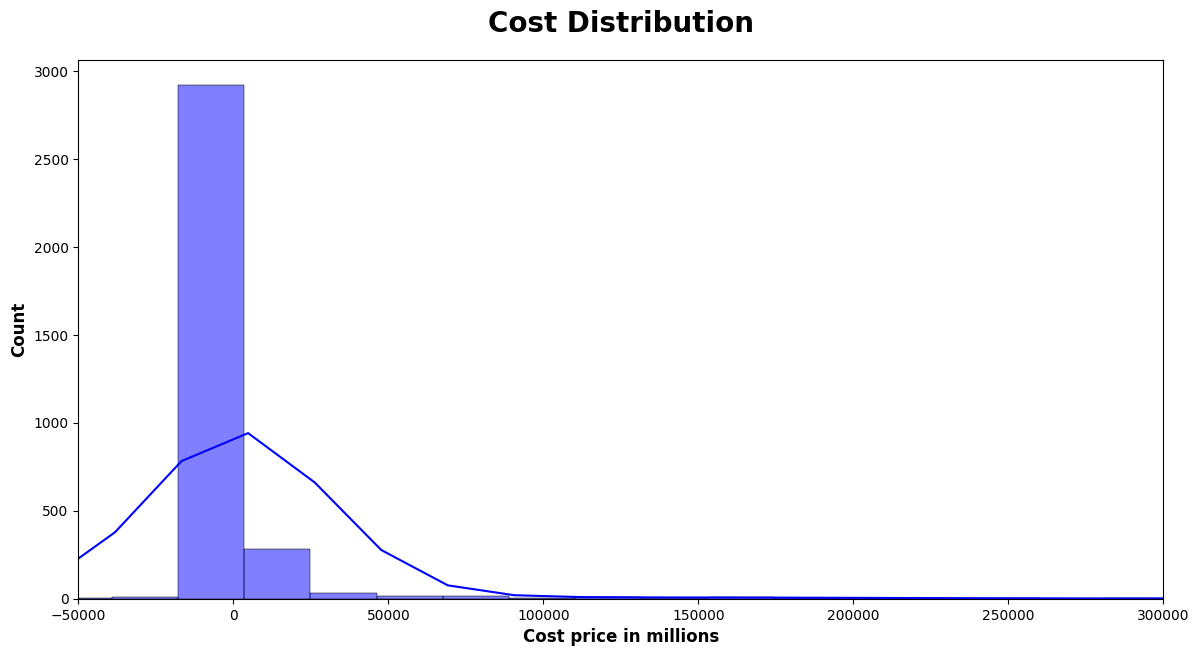

In [68]:
plt.subplots(figsize=(14,7))
sns.histplot(target_feature, bins=200, kde=True, color = 'b')
plt.title("Cost Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Cost price in millions", weight="bold", fontsize=12)
plt.xlim(-50000,300000)
plt.show()

In [67]:
international_shipment_median = df[df['International'] == 'Yes']['Cost'].median()
domestic_shipment_median = df[df['International'] == 'No']['Cost'].median()

print(f"The difference between the median shipment price of International and domestic is {international_shipment_median-domestic_shipment_median}")

The difference between the median shipment price of International and domestic is 21.07000000000005


In [69]:
express_shipment_median = df[df['Express Shipment'] == 'Yes']['Cost'].median()
normal_shipment_median = df[df['Express Shipment'] == 'No']['Cost'].median()

print(f"The difference between the median shipment price of express shipment and normal shipment is {express_shipment_median-normal_shipment_median}")

The difference between the median shipment price of express shipment and normal shipment is 81.11500000000001


**Insights**

- In express shipment also, there is only a difference of 83 in the shipping cost between International and domestic, so it won't affect much at the prediction

- It's obvious that there are more normal delivery than express 

In [72]:
df['Installation Included'].value_counts()

Installation Included
No     2000
Yes    1362
Name: count, dtype: int64

In [71]:
installation_needed_median = df[df['Installation Included'] == 'Yes']['Cost'].median()
installation_not_needed_median = df[df['Installation Included'] == 'No']['Cost'].median()

print(f"The difference between the median shipment price of Installation Included and not is {installation_needed_median-installation_not_needed_median}")

The difference between the median shipment price of Installation Included and not is 55.110000000000014


**Insights** 

- There is only a difference of 53 which won't make much a difference at the time of prediction

- We can see that the charges for not installation is less and values are more, which says that a business should try to take contract which requires installation

In [73]:
fragile_median = df[df['Fragile'] == 'Yes']['Cost'].median()
fragile_not_median = df[df['Fragile'] == 'No']['Cost'].median()

print(f"The difference between the median shipment price of Fragile cost and non-fragile cost is {fragile_median-fragile_not_median}")

The difference between the median shipment price of Fragile cost and non-fragile cost is -93.07


In [74]:
remote_median = df[df['Remote Location'] == 'Yes']['Cost'].median()
not_remote_median = df[df['Remote Location'] == 'No']['Cost'].median()

print(f"The difference between the median shipment price of remote shipment and non-remote shipment cost is {remote_median-not_remote_median}")

The difference between the median shipment price of remote shipment and non-remote shipment cost is 38.690000000000055


**Insights** 

- There is only a difference of 38.69 which won't make much a difference at the time of prediction


In [76]:
customer_info_wealthy_median = df[df['Customer Information'] == 'Wealthy']['Cost'].median()
customer_info_working_class_median = df[df['Customer Information'] == 'Working Class']['Cost'].median()


print(f"The difference between the median shipment price of remote shipment and non-remote shipment cost is {customer_info_wealthy_median-customer_info_working_class_median}")

The difference between the median shipment price of remote shipment and non-remote shipment cost is 80.84500000000003


**Insights**

- There is only a difference of 66 which won't make much a difference at the time of prediction


<font size=3>**Report**</font> 

<font size=3>After understanding relationship between the target column and categorical columns, that there doesn't seem to be much pattern, which model can find in the categorical columns also</font>

In [77]:
df['Scheduled Date'] = pd.to_datetime(df['Scheduled Date'])
df['Delivery Date'] = pd.to_datetime(df['Delivery Date'])

df['year'] = pd.DatetimeIndex(df['Scheduled Date']).year
df['month'] = pd.DatetimeIndex(df['Scheduled Date']).month

C:\Users\anubh\AppData\Local\Temp\ipykernel_2628\2991012765.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Scheduled Date'] = pd.to_datetime(df['Scheduled Date'])
C:\Users\anubh\AppData\Local\Temp\ipykernel_2628\2991012765.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Delivery Date'] = pd.to_datetime(df['Delivery Date'])


In [78]:
df.head()

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Cost,year,month
0,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,2015-06-07,2015-06-03,-283.29,2015,6
1,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,2017-03-06,2017-03-05,-159.96,2017,3
2,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,2015-03-09,2015-03-08,-154.29,2015,3
4,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,2016-12-18,2016-12-14,-159.23,2016,12
6,0.64,17.0,9.0,7264.0,Brass,8.26,90.67,No,Yes,No,Roadways,No,Working Class,No,2016-06-05,2016-06-02,-1536.66,2016,6


In [79]:
x = df.groupby(["year", "month"])["Cost"].mean()
df_wide = x.unstack().T
df_wide.head()

year,2015,2016,2017,2018,2019
month,,,,,
1,1092.042424,1489.028246,26251.389351,80575.022037,2055.725833
2,62987.383134,14865.873077,4756.151765,5188.617292,5895.158654
3,2637.934512,12605.094808,84735.664783,26166.692464,2947.341724
4,7782.396207,1372.666481,946.933125,5150.420000,3667.384853
5,24698.258732,5508.796667,14496.346379,24866.117813,25757.276061


In [80]:
df_wide[2015]

month
1      1092.042424
2     62987.383134
3      2637.934512
4      7782.396207
5     24698.258732
6      2873.023333
7      1875.414615
8      -761.615094
9      4442.385441
10     7038.891731
11     2247.828077
12    75121.459423
Name: 2015, dtype: float64

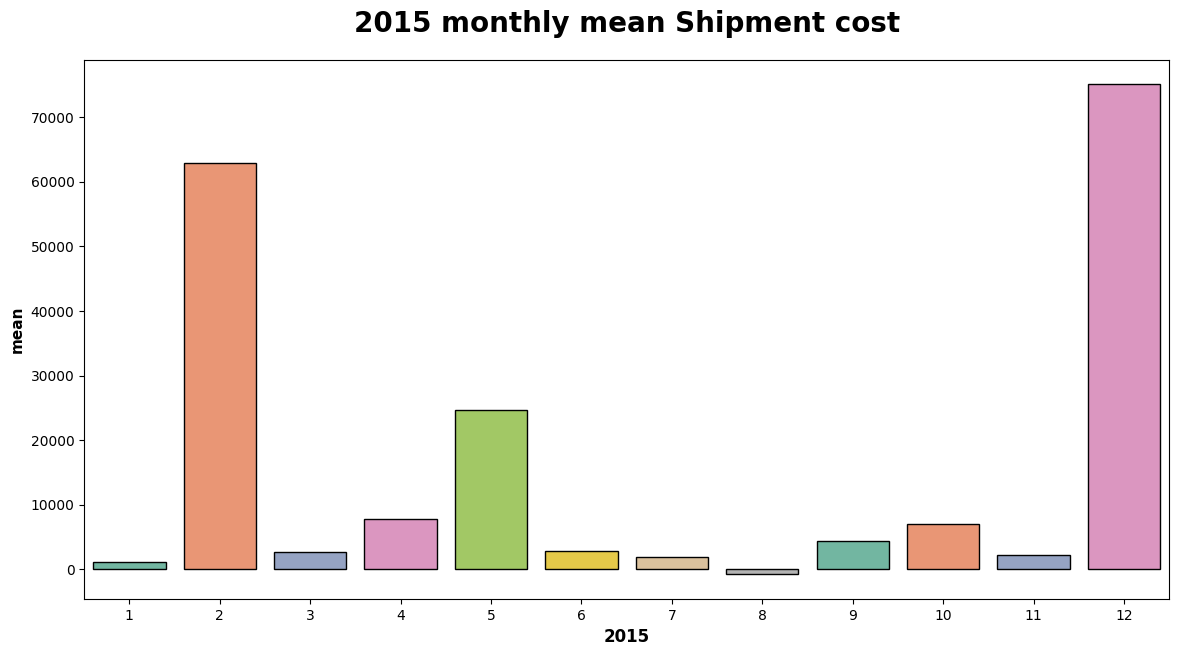

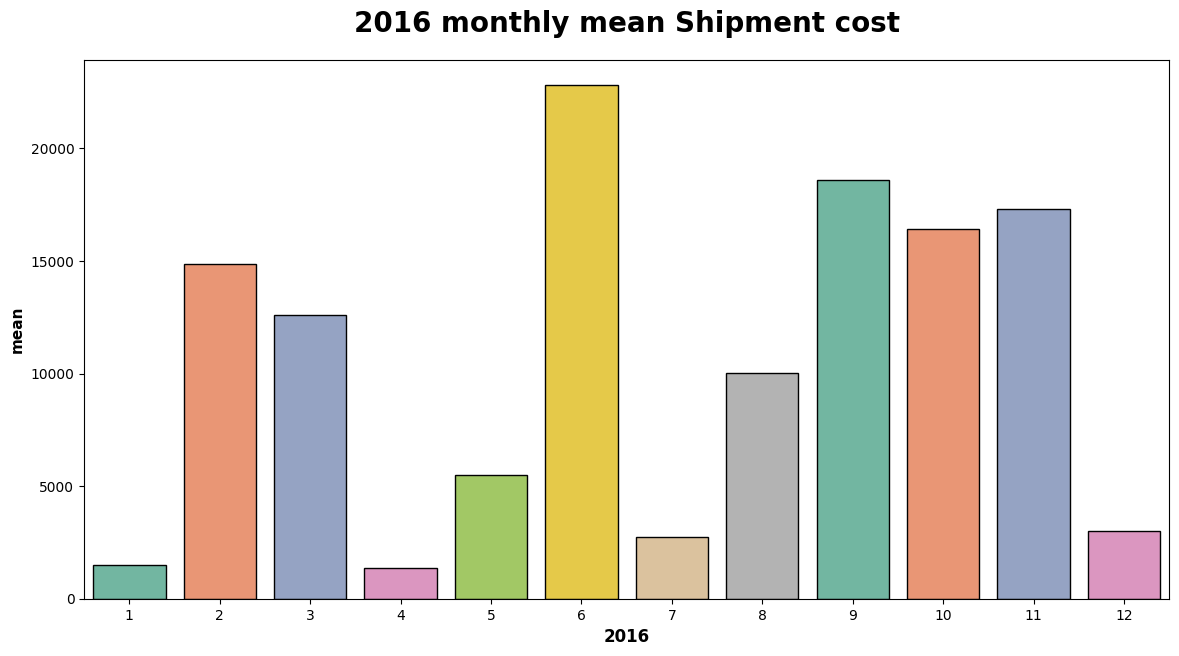

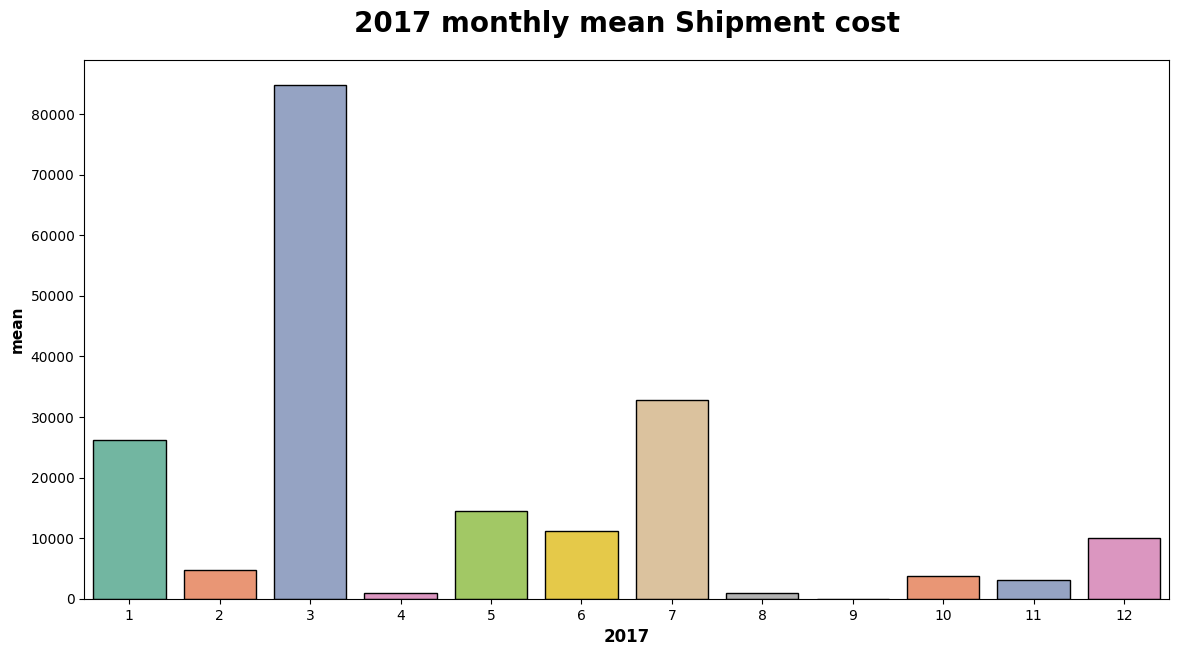

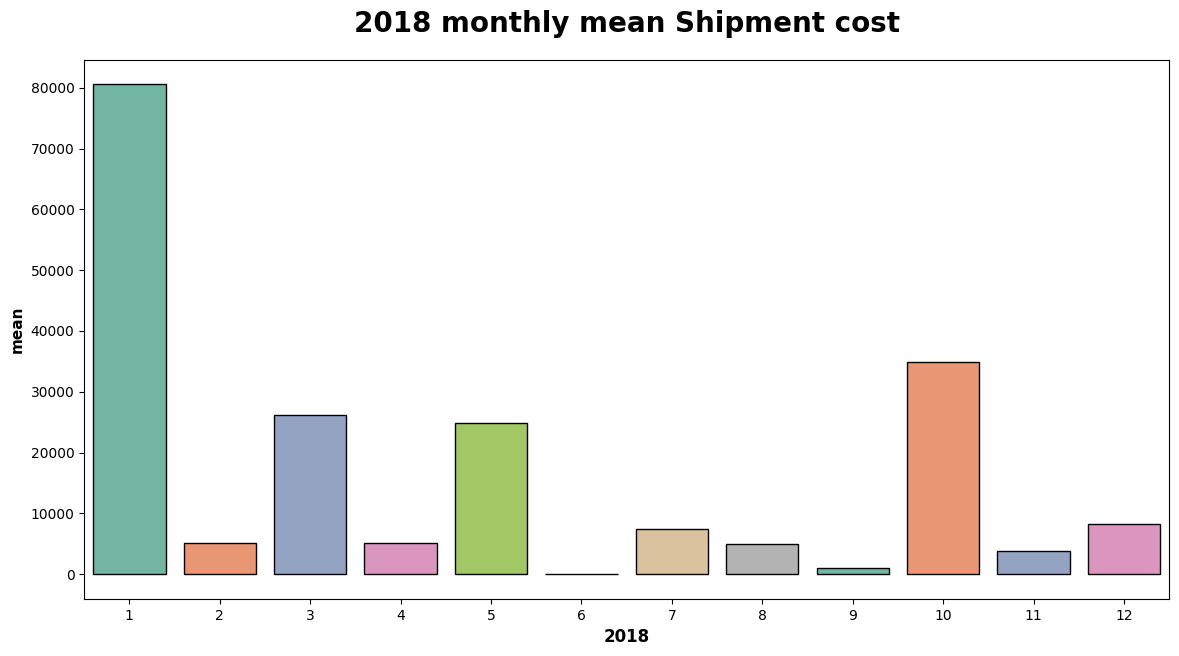

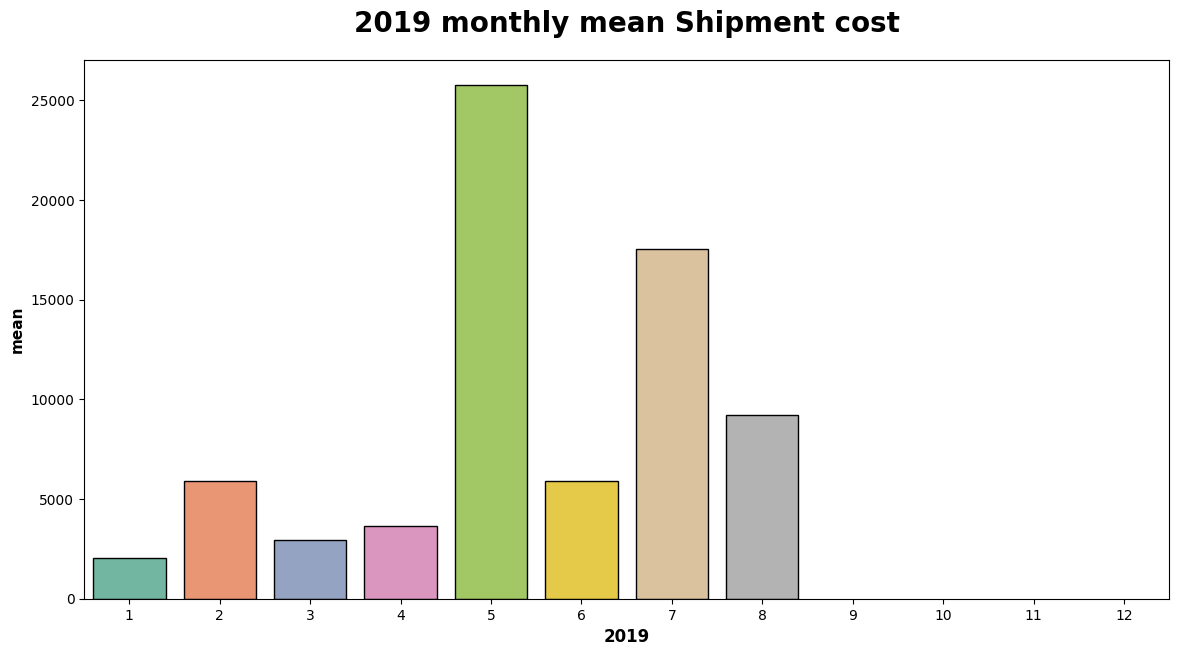

In [81]:
for i in df_wide.columns:
    plt.subplots(figsize=(14,7))
    sns.barplot(y=df_wide[i],x=df_wide.index,ec = "black", palette="Set2")
    plt.title(str(i) + " monthly mean Shipment cost", weight="bold",fontsize=20, pad=20)
    plt.ylabel("mean", weight="bold", fontsize=11)
    plt.xlabel(i, weight="bold", fontsize=12)
    plt.show()

**Insights**
 - Monthly distribution of every year is different
 - For 2015, 2016 and 2018 There were more cost at the start and end of the year.
 - For 2017 and 2019 cost were high mid year.

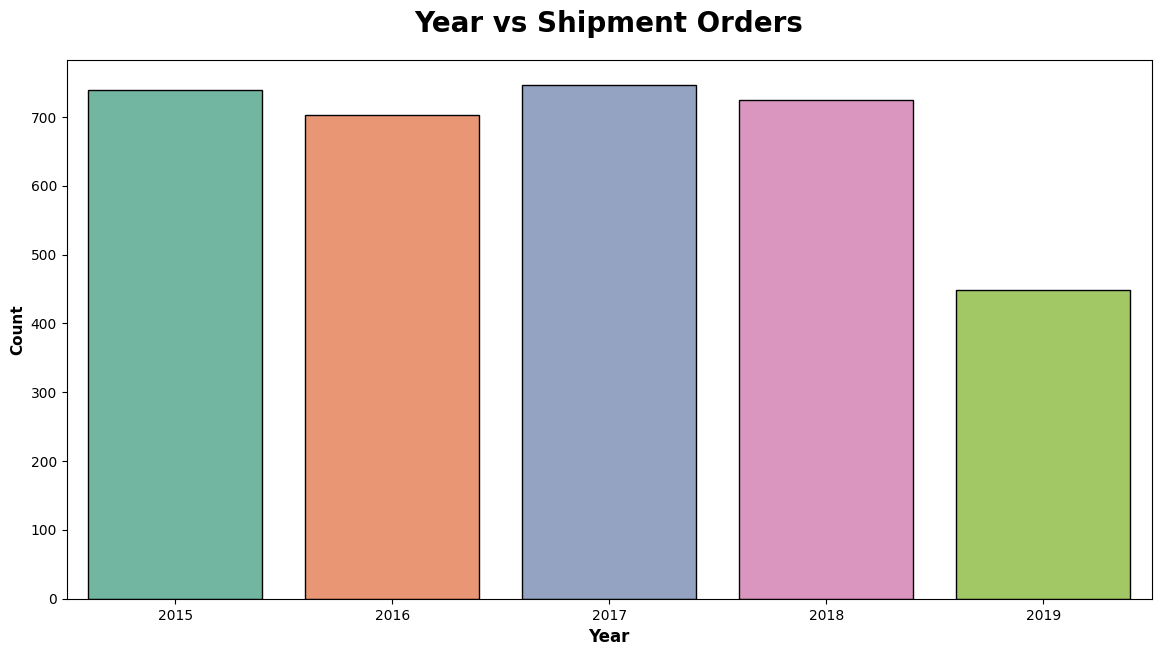

In [82]:
plt.subplots(figsize=(14,7))
sns.countplot(x=df.year,ec = "black", palette="Set2")
plt.title("Year vs Shipment Orders", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=11)
plt.xlabel("Year", weight="bold", fontsize=12)
plt.show()

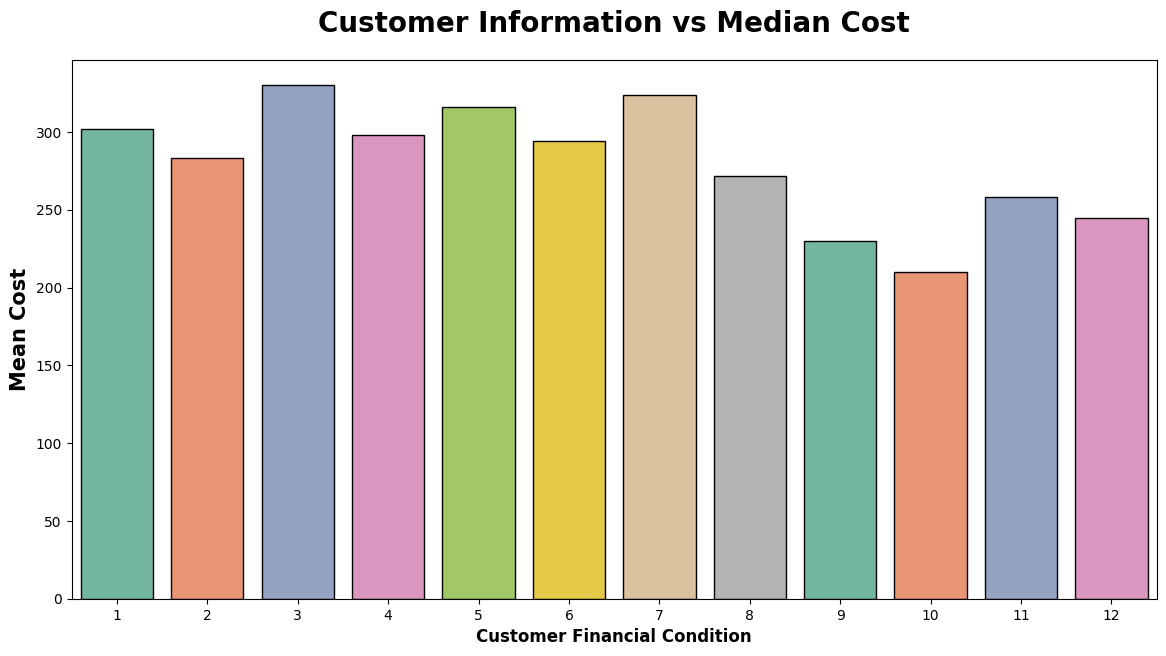

In [83]:
plt.subplots(figsize=(14,7))
sns.countplot(x=df.month,ec = "black", palette="Set2")
plt.title("Customer Information vs Median Cost", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mean Cost", weight="bold", fontsize=15)
plt.xlabel("Customer Financial Condition", weight="bold", fontsize=12)
plt.show()

* The `Cost` column is the target to predict.
* The target variable here is continuous.
* There are outliers in some columns we have to remove outliers.
* `date` column should be configured to extract `year` and `month`.
* Null values in `Artist Reputation`, `Height`, `Width`, `Weight`, `Material`, `Transport`, `Remote Location` needs to be handled